In [240]:
# opens SQL query directly in Python, rather than open from CSV
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=ASU_Professor_Salary;Trusted_Connection=yes;')
cursor = connection.cursor()

ASU_Dept_Query = '''
select
		Y18.Department_Description
		,Y12.Salary as _2012
		,Y13.Salary as _2013
		,Y14.Salary as _2014
		,Y15.Salary as _2015
		,Y16.Salary as _2016
		,Y17.Salary as _2017
		,Y18.Salary as _2018
		
	from (select [Department_Description]  --subselect groups departments that existed in the 2018 dataset
			,sum([Salary]) as Salary
		  from [dbo].[ASU Employee Salary Data - 2018]
		  group by [Department_Description]) as Y18
		
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2012]
		             group by [Department_Description]) as Y12 
					 on Y12.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2013]
		             group by [Department_Description]) as Y13
					 on Y13.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2014]
		             group by [Department_Description]) as Y14 
					 on Y14.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2015]
		             group by [Department_Description]) as Y15
					 on Y15.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2016]
		             group by [Department_Description]) as Y16
					 on Y16.[Department_Description] = Y18.[Department_Description]
		inner join (select [Department_Description] --departments that existed in 2012 are grouped and joined
			         ,sum([Salary]) as Salary
		             from [dbo].[ASU Employee Salary Data - 2017]
		             group by [Department_Description]) as Y17
					 on Y17.[Department_Description] = Y18.[Department_Description]

	order by Y18.Salary desc

  '''
# save the sql query to a pandas dataframe
ASU_Dept_Data = pd.read_sql(ASU_Dept_Query, connection)
connection.close()
ASU_Dept_Data.head()

Department_Description        _2012        _2013        _2014  \
0              SDA Administration  15278195.43  16358819.19  19442560.35   
1  School Of Earth & Space Explor   8516937.45  10098830.16  11138484.59   
2  Sch Elect Comptr & Energy Engr   9769400.90  10310200.49  10310961.24   
3                  College Of Law  11450116.33  11297878.88  12262677.71   
4   Sols Administration & Faculty  11856118.63  12213788.92  12663035.36   

         _2015        _2016       _2017         _2018  
0  21200237.53  24275289.13  23273528.0  2.416136e+07  
1  11143446.39  12286891.77  12402441.0  1.461352e+07  
2  11831195.45  12420762.21  12669747.0  1.388973e+07  
3  12193705.18  12874334.67  12713216.0  1.342066e+07  
4  12411504.38  12029652.47  12051865.0  1.328957e+07

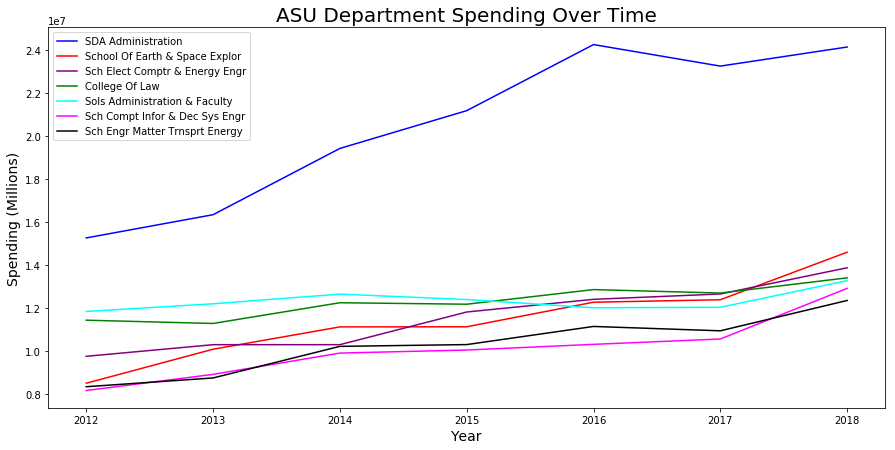

In [239]:
ASU_Dept_Data_Trans = ASU_Dept_Data.set_index('Department_Description').transpose() #rotate years to be the index

ASU_Dept_Data_Trans.index = ASU_Dept_Data_Trans.index.str.replace('_','') #remove underscore from attribute 'years' these were necessary to perform the SQL query

#add precision to dollar amounts on Y axis

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("ASU Department Spending Over Time",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Spending (Millions)",fontsize=14)

y1 = ASU_Dept_Data_Trans.iloc[:,0]
y2 = ASU_Dept_Data_Trans.iloc[:,1]
y3 = ASU_Dept_Data_Trans.iloc[:,2]
y4 = ASU_Dept_Data_Trans.iloc[:,3]
y5 = ASU_Dept_Data_Trans.iloc[:,4]
y6 = ASU_Dept_Data_Trans.iloc[:,5]
y7 = ASU_Dept_Data_Trans.iloc[:,6]

x = ASU_Dept_Data_Trans.index

# plt.ylim(0, 30000000)

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.plot(x, y5, color='cyan')
plt.plot(x, y6, color='magenta')
plt.plot(x, y7, color='black')
plt.legend()

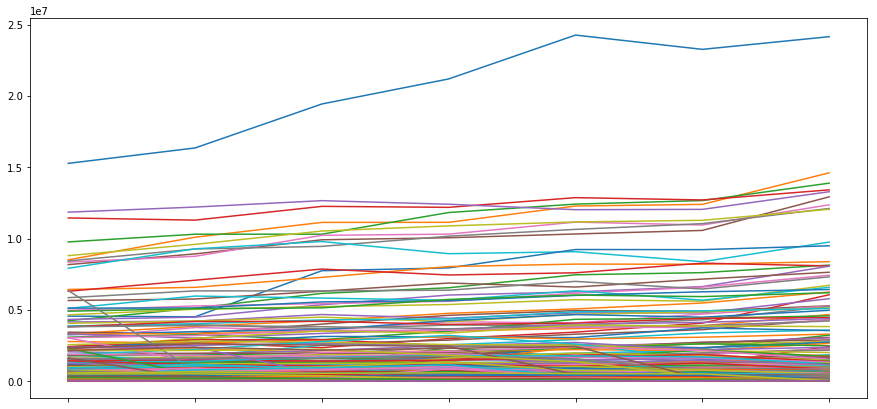

In [237]:
fig, ax = plt.subplots(figsize=(15,7))
ASU_Dept_Data_Trans.plot(ax=ax)
ax.get_legend().remove()

# ax.yaxis.set_major_formatter(tick.FormatStrFormatter('%2e'))